This notebook includes, preparing the dataset for training and applying the regression techniques contained in scikit-learn library to estimate video transcoding time.


> Dataset and detailed information: https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset



## 1.Download the Data Set
(Colab notebook is used)

In [1]:
#download the data set
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00335/online_video_dataset.zip --output online_video_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.8M  100 14.8M    0     0  12.4M      0  0:00:01  0:00:01 --:--:-- 12.4M


In [2]:
#unzip
!unzip online_video_dataset.zip

Archive:  online_video_dataset.zip
  inflating: README.txt              
  inflating: transcoding_mesurment.tsv  
  inflating: youtube_videos.tsv      


## 2. Data Pre-Process

### 2.1. Import and Analyze the Data

In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("transcoding_mesurment.tsv",sep='\t')
df.head()


,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [5]:
df.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

### 2.2. Correlation

In [7]:
corrTable = df.corr(method='pearson')
a = corrTable['utime'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("green",as_cmap=True)
a.style.background_gradient(cmap=cm)

,utime
utime,1.000000
umem,0.663301
o_width,0.523388
o_height,0.519649
o_bitrate,0.155479
bitrate,0.155200
width,0.129861
height,0.128479
o_framerate,0.104043
p_size,0.097644


### 2.3. Define Target and Features

In [8]:
target = df[['utime']]


In [9]:
# drop the target column and the columns with low correlation (< 0.05)
features = df.drop(columns = ['utime','b_size','b','duration','i','frames','p','id','o_codec'])
features.head()

,codec,width,height,bitrate,framerate,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,umem
0,mpeg4,176,144,54590,12.0,64483,825054,889537,56000,12.0,176,144,22508
1,mpeg4,176,144,54590,12.0,64483,825054,889537,56000,12.0,320,240,25164
2,mpeg4,176,144,54590,12.0,64483,825054,889537,56000,12.0,480,360,29228
3,mpeg4,176,144,54590,12.0,64483,825054,889537,56000,12.0,640,480,34316
4,mpeg4,176,144,54590,12.0,64483,825054,889537,56000,12.0,1280,720,58528


### 2.4. One hot encoding for codec column

In [10]:
features['codec'].value_counts()

h264     31545
vp8      18387
mpeg4    12012
flv       6840
Name: codec, dtype: int64

In [11]:
features= pd.get_dummies(features, columns=['codec'])
features.head()

,width,height,bitrate,framerate,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,umem,codec_flv,codec_h264,codec_mpeg4,codec_vp8
0,176,144,54590,12.0,64483,825054,889537,56000,12.0,176,144,22508,0,0,1,0
1,176,144,54590,12.0,64483,825054,889537,56000,12.0,320,240,25164,0,0,1,0
2,176,144,54590,12.0,64483,825054,889537,56000,12.0,480,360,29228,0,0,1,0
3,176,144,54590,12.0,64483,825054,889537,56000,12.0,640,480,34316,0,0,1,0
4,176,144,54590,12.0,64483,825054,889537,56000,12.0,1280,720,58528,0,0,1,0


### 2.5. Scaling 

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(features)
print("Feture Matrix X with shape:",X.shape,"\n",X)

Y = scaler.fit_transform(target)
print("\nTarget Array Y with shape:",Y.shape,"\n",Y)

Feture Matrix X with shape: (68784, 16) 
 [[0.         0.         0.00606371 ... 0.         1.         0.        ]
 [0.         0.         0.00606371 ... 0.         1.         0.        ]
 [0.         0.         0.00606371 ... 0.         1.         0.        ]
 ...
 [0.08256881 0.1025641  0.04605738 ... 0.         0.         1.        ]
 [0.63302752 0.61538462 0.37258851 ... 1.         0.         0.        ]
 [0.         0.         0.00614928 ... 0.         1.         0.        ]]

Target Array Y with shape: (68784, 1) 
 [[0.00190739]
 [0.0035474 ]
 [0.00459914]
 ...
 [0.00253131]
 [0.02344133]
 [0.01288827]]


### 2.6. Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target,test_size = 0.3, random_state=0)

scores = dict()  #dictionary for storing test scores

## 3. Implementing Regression Techniques

### 3.1. Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_score = lr.score(x_test,y_test)

print("Linear Regression Score:{:.4f}".format(lr_score) )
scores['Linear Reg'] = lr_score


Linear Regression Score:0.5727


### 3.2. Polynomial Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)

pr = LinearRegression()
pr.fit(train_x_poly, y_train)

x_test_poly = poly.fit_transform(x_test)
pr_score = pr.score(x_test_poly,y_test)

print("Polynomial Regression Score:{:.4f}".format(pr_score) )
scores['Polynomial Reg'] = pr_score


Polynomial Regression Score:0.3877


### 3.3. Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=1.0)
rr.fit(x_train, y_train)
rr_score = rr.score(x_test,y_test)

print("Ridge Regression Score:{:.4f}".format(rr_score) )
scores['Ridge Reg'] = rr_score


Ridge Regression Score:0.5727


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.4794e-21): result may not be accurate.
  overwrite_a=True).T


### 3.4. K Neighbors Regressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = range(1, 10)

training_scores = []
test_scores = []
for n_neighbors in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors).fit(x_train, y_train)
    training_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

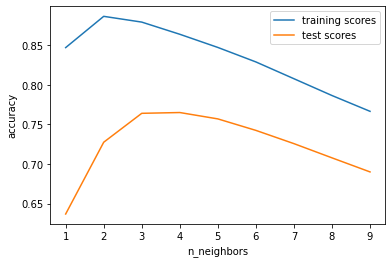

In [18]:
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [19]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
knn_score = knn.score(x_test,y_test)

print("K Neighbors Regressor Score:{:.4f}".format(knn_score) )
scores['KNN Reg'] = knn_score

K Neighbors Regressor Score:0.7640


### 3.5. SVR 

In [20]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train.values.ravel())   #It may take some time
svr_score = knn.score(x_test,y_test)

print("SVR Score:{:.4f}".format(svr_score) )
scores['SVR Reg'] = svr_score


SVR Score:0.7640


### 3.6. Stochastic Gradient Descent Regressor

In [21]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train, y_train.values.ravel())
sgd_score = sgd.score(x_test,y_test)

print("SGD Regressor Score:{:.4f}".format(sgd_score) )
scores['SGD Reg'] = sgd_score

SGD Regressor Score:-13894881144015551426496079879835614598425214976.0000


### 3.7. Decision Tree Regressor 

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_score = dtr.score(x_test,y_test)

print("Decision Tree Regressor Score:{:.4f}".format(dtr_score) )
scores['Decision Tree Reg'] = dtr_score

Decision Tree Regressor Score:0.7138


### 3.8. Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train.values.ravel())
rfr_score = rfr.score(x_test,y_test)

print("Random Forest Regressor Score:{:.4f}".format(rfr_score) )
scores['Random Forest Reg'] = rfr_score


Random Forest Regressor Score:0.7852


### 3.9. Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train.values.ravel())
gbr_score = gbr.score(x_test,y_test)

print("Gradient Boosting Regressor Score:{:.4f}".format(gbr_score) )
scores['Gradient Boosting Reg'] = gbr_score

Gradient Boosting Regressor Score:0.8309


### 3.10. XG Boost Regressor

In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor(silent=True)
xgb.fit(x_train,y_train)
xgb_score = xgb.score(x_test,y_test)

print("XG Boost Regressor Score:{:.4f}".format(xgb_score) )
scores['XG Boost Reg'] = xgb_score

XG Boost Regressor Score:0.8302


### 3.11. Extra Tree Regressor

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train.values.ravel())
etr_score = etr.score(x_test,y_test)

print("Exra Tree Regressor Score:{:.4f}".format(etr_score) )
scores['Extra Tree Reg'] = etr_score

Exra Tree Regressor Score:0.7196


### 3.12. Voting Regressor 

In [27]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[('rfr', rfr), ('gbr', gbr), ('xgb', xgb)])
vr.fit(x_train,y_train.values.ravel())
vr_score = vr.score(x_test,y_test)

print("Voting Regressor Score:{:.4f}".format(vr_score) )
scores['Voting Reg'] = vr_score

Voting Regressor Score:0.8303


## 4. Results

In [28]:
del scores['SGD Reg']   #SGD Reg was not eligible

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


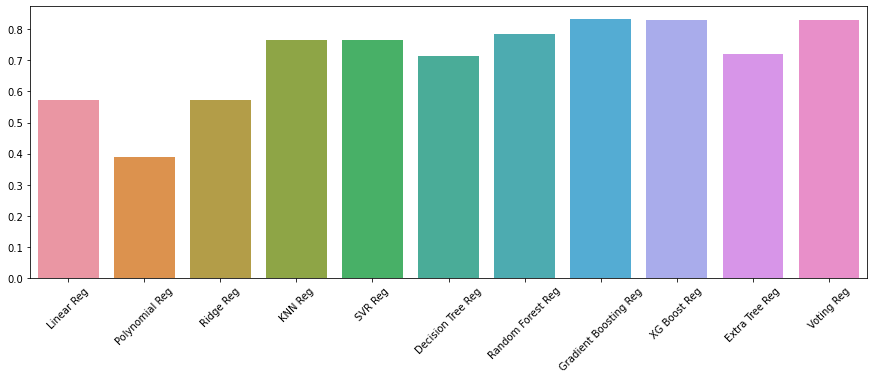

In [29]:
x = list(scores.keys())
y = list(scores.values())

fig = plt.figure(figsize=(15,5))
ax = sns.barplot(x,y)
plt.xticks(rotation=45)
plt.show()

In [30]:
pd.DataFrame(data=(y),index=x,columns=['scores']).transpose()

,Linear Reg,Polynomial Reg,Ridge Reg,KNN Reg,SVR Reg,Decision Tree Reg,Random Forest Reg,Gradient Boosting Reg,XG Boost Reg,Extra Tree Reg,Voting Reg
scores,0.57266,0.387664,0.57266,0.764002,0.764002,0.713796,0.785157,0.830925,0.830242,0.719637,0.830308
